# Gesture based control for consumer electronics

Importing required libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy

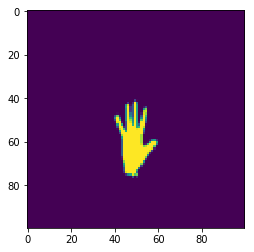

In [16]:
X = []
Y = []
X_test = []
Y_test = []
for i in range(25):
    for j in range(15):
        img = cv2.imread("work/u"+ str(i+1) + "_" + str(j+1) + ".png")
        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        k = cv2.normalize(img1, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        blur = cv2.GaussianBlur(k,(5,5),0)
        ret, thresh1 = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(thresh1, connectivity=4)
        sizes = stats[:, -1]

        max_label = 1
        max_size = sizes[1]
        for k in range(2, nb_components):
            if sizes[k] > max_size:
                max_label = k
                max_size = sizes[k]

        img2 = np.zeros(output.shape)
        img2[output == max_label] = 255
        
        new_image = img2[stats[max_label][1]:stats[max_label][1]+stats[max_label][3],stats[max_label][0]:stats[max_label][0]+stats[max_label][2]]
        image_for_input = cv2.resize(img2, (100, 100), interpolation = cv2.INTER_AREA)
        plt.imshow(image_for_input)
        if(i<15):
            X.append(image_for_input)
            Y.append(j)
        else:
            X_test.append(image_for_input)
            Y_test.append(j)
        cv2.imwrite("work/o"+ str(i+1) + "_" + str(j+1) + ".png",thresh1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

import tensorflow as tf

run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)


# create model
model = Sequential()
#add model layers

model.add(Conv2D(100, kernel_size=3, activation="relu", input_shape=(100,100,1)))
model.add(Conv2D(100, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(15, activation="softmax"))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.utils import to_categorical
y_binary = to_categorical(np.array(Y))
y_binary_test = to_categorical(np.array(Y_test))

# # Fit the model
model.fit(np.expand_dims(np.array(X), axis=-1), y_binary, validation_data=(np.expand_dims(np.array(X_test), axis=-1), y_binary_test), epochs=5)

# # evaluate the model
scores = model.evaluate(np.expand_dims(np.array(X_test), axis=-1), y_binary_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: zero-size array to reduction operation maximum which has no identity